#               Рубежный контроль №1: Методы обработки данных

Выполнил: Чжан Чжибо  
Группа: ИУ5И-21М  
Вариант 18

# Задача №1  
Для набора данных проведите масштабирование данных для одного (произвольного) числового признака на основе Z-оценки

Подключим необходимые библиотеки:

In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
color = sns.color_palette()
sns.set_style('darkgrid')

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 

Возьмём набор данных:

In [2]:
dataset=pd.read_csv(r'D:/MMO_data/heart-attack/heart.csv')
dataset.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.400,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.300,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.500,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.600,2,0,2,1


Посмотрим на наборы данных перед масштабированием:

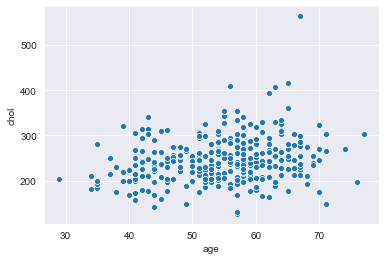

In [3]:
sns.scatterplot(x='age',y='chol',data=dataset)

Масштабирование на основе Z-оценки:

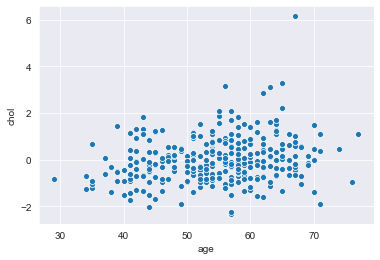

In [4]:
import sklearn.preprocessing
scaler=sklearn.preprocessing.StandardScaler()
dataset['chol']=scaler.fit_transform(dataset[['chol']])
sns.scatterplot(x='age',y='chol',data=dataset)

# Задача №2
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectKBest для 10 лучших признаков, и метод, основанный на взаимной информации

Разделим набор данных на Х и y:

In [5]:
X=dataset.drop('output', axis = 1)
y=dataset.output

Размерность перед отбором признаков:

In [6]:
X.shape

(303, 13)

Отбор признаков с помощью класса SelectKBest и метода "mutual_info_regression"

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [8]:
selector=SelectKBest(mutual_info_classif,k=10)
selector.fit(X,y)
X_selected=selector.transform(X)
X_selected.shape

(303, 10)

In [9]:
selector.get_support(indices=False)

array([False,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True])

Признаки, выбранные селектором:
'sex','cp','chol','fbs','thalachh','exng','oldpeak','slp','caa','thall'